# Assignment 07

In [1]:
# import the data
# sep x,y
# find out the coef , intercept
# y = m1*x1 + m2*x2 + m3*x3 + c

#KNN Regressor


# calculate r2_score
#compared

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
# import the data

In [4]:
df=pd.read_csv('insurance.csv')
df.shape

(1338, 7)

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Encoding
- Label Encoding

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

## For remove warning need import warnings and filter ignore

In [8]:
import warnings
warnings.filterwarnings('ignore')
from pandas.core.dtypes.common import is_numeric_dtype

In [9]:
for col in df.columns:
    if is_numeric_dtype(df[col]):
        continue
    else:
        df[col]=le.fit_transform(df[col])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
df1=df.copy()
df2=df.copy()

In [12]:
df1.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


## Exploratory Data Analysis
1. Distribution of the target variable

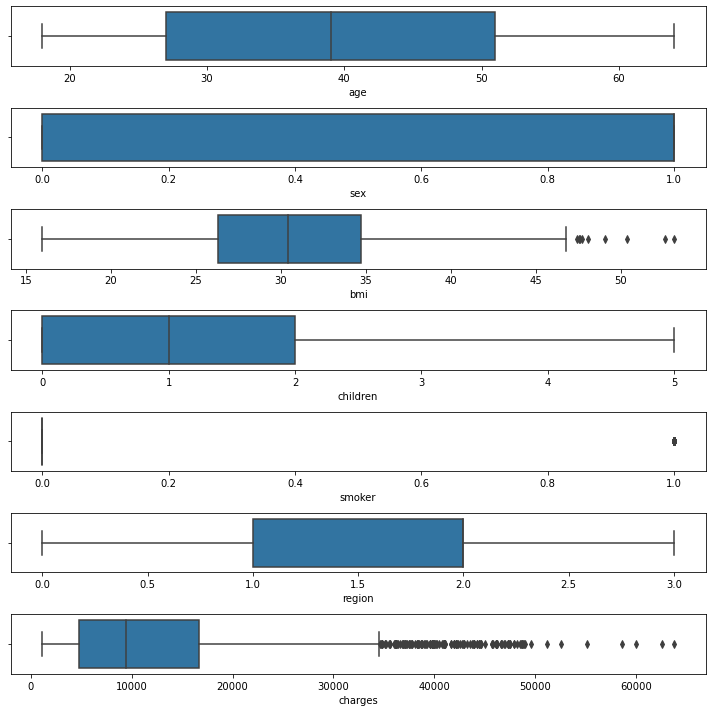

In [13]:
fig, axs = plt.subplots(7, figsize = (10,10))
plt1 = sns.boxplot(df1['age'], ax = axs[0])
plt2 = sns.boxplot(df1['sex'], ax = axs[1])
plt3 = sns.boxplot(df1['bmi'], ax = axs[2])
plt3 = sns.boxplot(df1['children'], ax = axs[3])
plt3 = sns.boxplot(df1['smoker'], ax = axs[4])
plt3 = sns.boxplot(df1['region'], ax = axs[5])
plt3 = sns.boxplot(df1['charges'], ax = axs[6])
plt.tight_layout()

<AxesSubplot:xlabel='charges', ylabel='Density'>

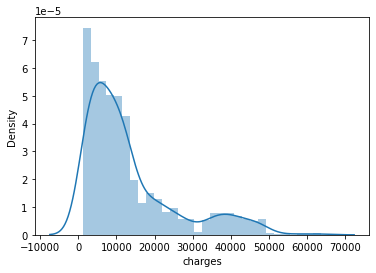

In [14]:
sns.distplot(df1['charges'])

## Make normally Distributed

<AxesSubplot:ylabel='Density'>

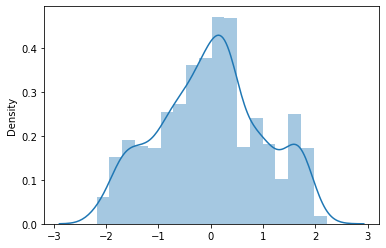

In [15]:
from matplotlib import pyplot as plt
from scipy.stats import normaltest
import numpy as np
from sklearn.preprocessing import PowerTransformer
data=np.array([df1.charges])
pt = PowerTransformer(method='yeo-johnson')
data = data.reshape(-1, 1)
pt.fit(data)
df1['charges'] = pt.transform(data)
sns.distplot([df1.charges])

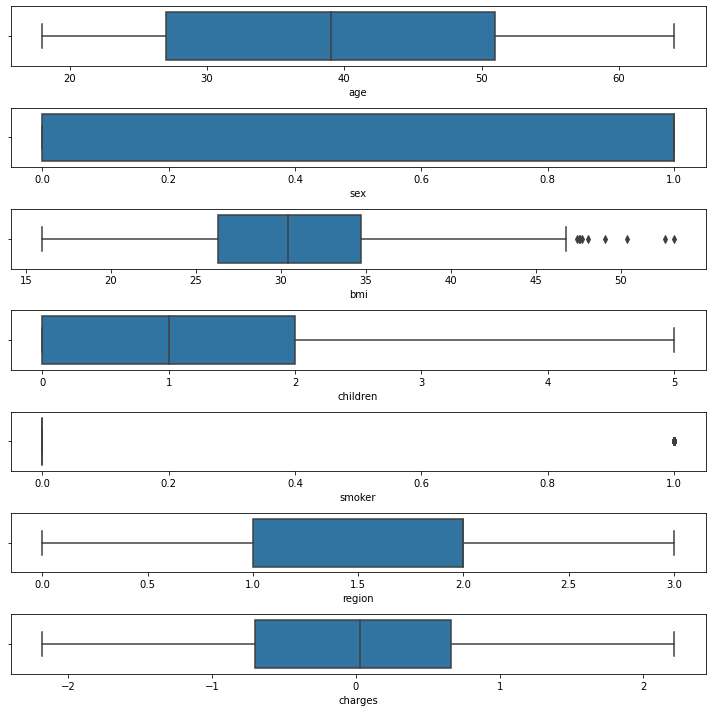

In [16]:
fig, axs = plt.subplots(7, figsize = (10,10))
plt1 = sns.boxplot(df1['age'], ax = axs[0])
plt2 = sns.boxplot(df1['sex'], ax = axs[1])
plt3 = sns.boxplot(df1['bmi'], ax = axs[2])
plt3 = sns.boxplot(df1['children'], ax = axs[3])
plt3 = sns.boxplot(df1['smoker'], ax = axs[4])
plt3 = sns.boxplot(df1['region'], ax = axs[5])
plt3 = sns.boxplot(df1['charges'], ax = axs[6])
plt.tight_layout()

2. How Sales are related with other variables

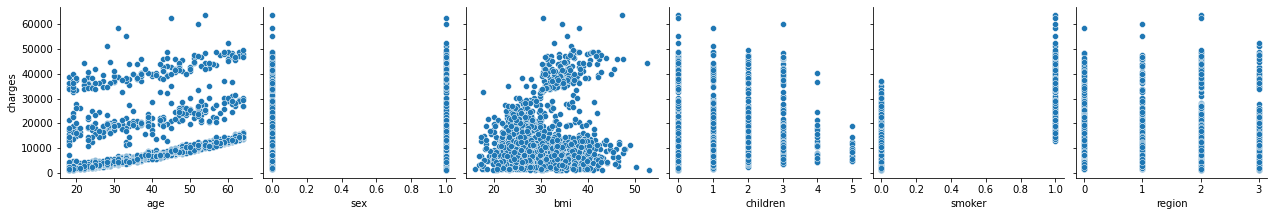

In [17]:
# Before Normally Distributed
sns.pairplot(df, x_vars=['age', 'sex', 'bmi','children','smoker','region'], y_vars='charges', height=3, aspect=1, kind='scatter')
plt.show()

3. Heatmap

<AxesSubplot:>

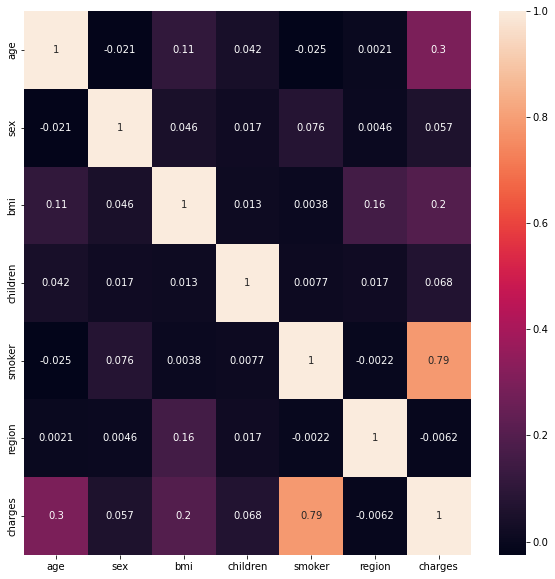

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

## After Normally Distributed

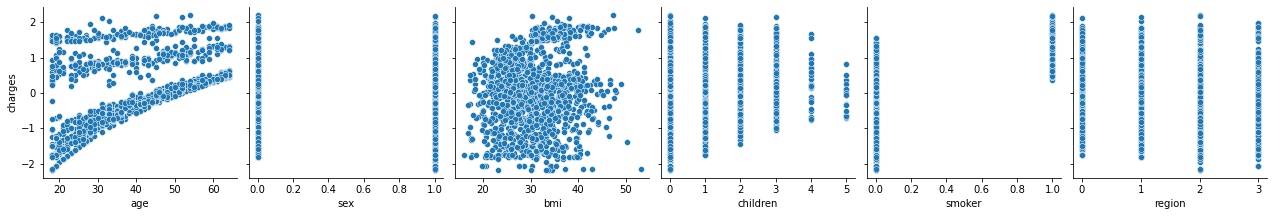

In [19]:
sns.pairplot(df1, x_vars=['age', 'sex', 'bmi','children','smoker','region'], y_vars='charges', height=3, aspect=1, kind='scatter')
plt.show()

3. Heatmap

<AxesSubplot:>

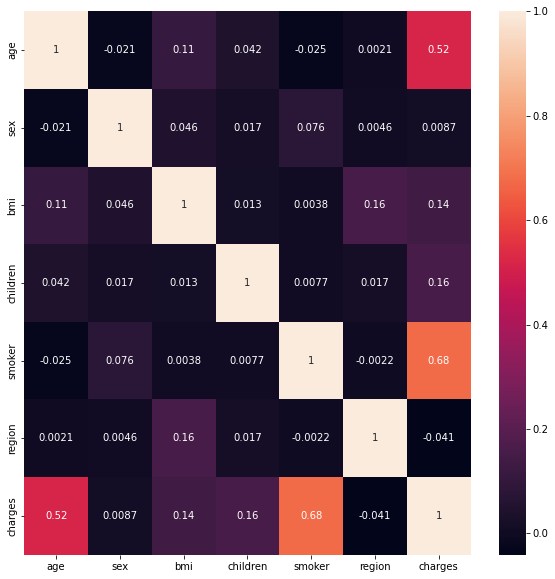

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(), annot=True)

In [21]:
# sep x,y

In [22]:
x=df.drop('charges', axis=1)
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [23]:
y=df['charges']
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [24]:
# Train-Test-Split

In [25]:
from sklearn.model_selection import train_test_split as tts

In [26]:
x_train,x_test,y_train,y_test= tts(x,y,test_size=.30, random_state=42)

In [27]:
x_test.shape

(402, 6)

In [28]:
# Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lreg=LinearRegression()

In [31]:
lreg.fit(x_train,y_train)

LinearRegression()

In [32]:
# find out the coef , intercept

In [33]:
c=lreg.coef_
c

array([  261.62568984,   109.64719595,   344.54483066,   424.37016596,
       23620.80252148,  -326.46262527])

In [34]:
coef=list(zip(x, lreg.coef_))
coef

[('age', 261.62568984274697),
 ('sex', 109.64719595059212),
 ('bmi', 344.544830656035),
 ('children', 424.37016595762924),
 ('smoker', 23620.80252148174),
 ('region', -326.4626252721903)]

In [35]:
intercept=lreg.intercept_
intercept

-12364.391322279214

In [36]:
pred = lreg.predict(x_test)
pred

array([ 8.93142116e+03,  7.07090670e+03,  3.69370805e+04,  9.59699214e+03,
        2.70083549e+04,  1.08664849e+04,  3.74610217e+01,  1.72228092e+04,
        9.18308115e+02,  1.13965537e+04,  2.79154456e+04,  9.53381323e+03,
        5.18928014e+03,  3.86124990e+04,  4.05094490e+04,  3.72748566e+04,
        1.53562559e+04,  3.59449407e+04,  9.10631783e+03,  3.14429410e+04,
        3.66298253e+03,  1.00966745e+04,  2.21091896e+03,  7.10598084e+03,
        1.13521417e+04,  1.30231210e+04,  1.44472857e+04,  6.12031303e+03,
        9.94564893e+03,  2.18617424e+03,  8.91389260e+03,  1.31869496e+04,
        4.49110116e+03,  3.30469662e+03,  4.32885102e+03,  1.32330189e+04,
        1.67071398e+03,  8.63238607e+03,  3.32727214e+04,  3.26840062e+04,
        3.60294190e+03,  4.40040903e+03,  1.40663345e+04,  1.16268203e+04,
        8.89219642e+03,  1.21011367e+04,  5.23906853e+03,  2.84241293e+03,
        3.56294259e+04,  9.27854339e+03,  1.59720792e+04,  2.34524488e+03,
        1.24695907e+04,  

In [37]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

In [38]:
mse=mean_squared_error(y_test,pred)
mse

33805466.89868861

In [39]:
mae=mean_absolute_error(y_test,pred)
mae

4155.239843059381

In [40]:
r_score=r2_score(y_test,pred)
r_score

0.7694415927057694

In [41]:
lreg.score(x_test,y_test)

0.7694415927057694

In [42]:
lreg.score(x_train,y_train)

0.7422571320172101

In [43]:
mlreg_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': pred})
mlreg_diff

,Actual value,Predicted value
764,9095.06825,8931.421164
887,5272.17580,7070.906703
890,29330.98315,36937.080496
1293,9301.89355,9596.992144
259,33750.29180,27008.354871
...,...,...
701,9541.69555,16133.551618
672,4399.73100,6743.836928
1163,2200.83085,2066.203492
1103,11363.28320,14697.798124


In [44]:
#Model Evaluation

rootMeanSqErr = np.sqrt(mse)
print('r2 score:', r_score)
print('R squared: {:.2f}'.format(lreg.score(x,y)*100))
print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', rootMeanSqErr)

r2 score: 0.7694415927057694
R squared: 75.05
Mean Absolute Error: 4155.239843059381
Mean Square Error: 33805466.89868861
Root Mean Square Error: 5814.246890069995


# Again Calculate r2_score After Normally Distributed

In [45]:
# sep X,Y

In [46]:
X=df1.drop('charges', axis=1)
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [47]:
Y=df1['charges']
Y.head()

0    0.681663
1   -1.748842
2   -0.768811
3    0.978834
4   -0.916592
Name: charges, dtype: float64

# Train-Test-Split

In [48]:
from sklearn.model_selection import train_test_split as tts

xtrain,xtest,ytrain,ytest= tts(X,Y,test_size=.30, random_state=42)
xtest.shape

(402, 6)

# Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()

In [50]:
lreg.fit(xtrain,ytrain)

LinearRegression()

In [51]:
# find out the coef , intercept

In [52]:
coef=lreg.coef_
coef

array([ 0.03699302, -0.07901972,  0.01463942,  0.0997564 ,  1.71011539,
       -0.04923741])

In [53]:
print(list(zip(X, lreg.coef_)))

[('age', 0.03699302202529917), ('sex', -0.07901972288487222), ('bmi', 0.01463941657029705), ('children', 0.09975640372373194), ('smoker', 1.7101153904185051), ('region', -0.04923741294407897)]


In [54]:
intercept=lreg.intercept_
intercept

-2.2394398815699454

In [55]:
pred = lreg.predict(xtest)
pred

array([-6.69377083e-03, -5.17453216e-01,  2.18257222e+00,  1.01429865e-02,
        5.12575968e-01, -4.80621720e-01, -1.25620341e+00,  5.54763477e-01,
       -9.50519752e-01,  1.64235134e-01,  1.01020518e+00, -2.03650554e-01,
       -7.32180329e-01,  1.91410848e+00,  2.11180721e+00,  1.80142468e+00,
        2.99066478e-01,  1.74687095e+00, -1.25843656e-01,  1.40571876e+00,
       -6.92682218e-01, -1.98714109e-01, -1.31826616e+00, -8.42871420e-01,
        2.71903412e-01,  2.36599441e-01,  3.46272723e-01, -5.45558225e-01,
        8.81534418e-02, -1.30982802e+00, -7.94707190e-02,  2.85824393e-01,
       -1.05058479e+00, -5.87561062e-01, -9.65414370e-01, -7.10516367e-02,
       -1.12406166e+00, -2.58977214e-01,  1.79808077e+00,  1.23999362e+00,
       -7.66815369e-01, -9.95148420e-01,  3.08304630e-01,  1.87610828e-01,
       -4.73292754e-01,  2.18756816e-01, -8.19987445e-01, -8.07319536e-01,
        1.70972993e+00, -5.08630738e-01,  5.24056502e-01, -1.22134397e+00,
       -1.02835375e-01, -

In [56]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

In [57]:
mse1=mean_squared_error(ytest,pred)
mse1

0.2119527777916159

In [58]:
mae1=mean_absolute_error(ytest,pred)
mae1

0.2884879235849195

In [59]:
r_score1=r2_score(ytest,pred)
r_score1

0.7864501086456576

In [60]:
lreg.score(xtest,ytest)

0.7864501086456576

In [61]:
lreg.score(xtrain,ytrain)

0.7627703617628925

In [62]:
mlreg_diff1 = pd.DataFrame({'Actual value': ytest, 'Predicted value': pred})
mlreg_diff1

,Actual value,Predicted value
764,-0.001730,-0.006694
887,-0.588942,-0.517453
890,1.307400,2.182572
1293,0.022786,0.010143
259,1.468841,0.512576
...,...,...
701,0.050566,0.265252
672,-0.780680,-0.650395
1163,-1.501007,-1.160514
1103,0.242090,0.256851


In [63]:
rootMeanSqErr1 = np.sqrt(mse1)
print('r2 score:', r_score1)
print('R squared: {:.2f}'.format(lreg.score(X,Y)*100))
print('Mean Absolute Error:', mae1)
print('Mean Square Error:', mse1)
print('Root Mean Square Error:', rootMeanSqErr1)

r2 score: 0.7864501086456576
R squared: 76.99
Mean Absolute Error: 0.2884879235849195
Mean Square Error: 0.2119527777916159
Root Mean Square Error: 0.46038329443151593


# Apply KNN Regressor

In [64]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=7)

In [65]:
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=7)

In [66]:
knn_pred=knn.predict(x_test)

In [67]:
knn_mse=mean_squared_error(y_test,knn_pred)
knn_mae=mean_absolute_error(y_test,knn_pred)
knn_r2_score=r2_score(y_test,knn_pred)
knn_rootMeanSqErr = np.sqrt(knn_mse)
print("KNN_mean_squared_error \"MSE:\"",knn_mse)
print('KNN Root Mean Square Error:', knn_rootMeanSqErr)
print("KNN_mean_absolute_error \"MAE:\"",knn_mae)
print("KNN_r2_score:",knn_r2_score)
print('KNN R squared: {:.2f}'.format(knn.score(x,y)*100))


KNN_mean_squared_error "MSE:" 127146447.83043788
KNN Root Mean Square Error: 11275.923369304966
KNN_mean_absolute_error "MAE:" 8114.493024337953
KNN_r2_score: 0.13284195740417548
KNN R squared: 26.22


In [68]:
# Using Normally Distributed Data

In [69]:
knn.fit(xtrain,ytrain)
knn_pred1=knn.predict(xtest)

In [70]:
knn_mse=mean_squared_error(ytest,knn_pred1)
knn_mae=mean_absolute_error(ytest,knn_pred1)
knn_r2_score=r2_score(ytest,knn_pred1)
knn_rootMeanSqErr = np.sqrt(knn_mse)
print("KNN_mean_squared_error \"MSE:\"",knn_mse)
print('KNN Root Mean Square Error:', knn_rootMeanSqErr)
print("KNN_mean_absolute_error \"MAE:\"",knn_mae)
print("KNN_r2_score:",knn_r2_score)
print('KNN R squared: {:.2f}'.format(knn.score(X,Y)*100))


KNN_mean_squared_error "MSE:" 0.66965844587321
KNN Root Mean Square Error: 0.8183266132011167
KNN_mean_absolute_error "MAE:" 0.6141108331826223
KNN_r2_score: 0.3252955217159763
KNN R squared: 39.87


In [71]:
LRDF = pd.DataFrame({'Result Name': ['LREG r2 score:','KNN r2 score:','LREG Mean Square Error:','KNN Mean Square Error:','LREG Mean Absolute Error:','KNN Mean Absolute Error:', 'LREG Root Mean Square Error:','KNN Root Mean Square Error:'], 'Result Score': [r_score1,knn_r2_score,mse1,knn_mse,mae1,knn_mae,rootMeanSqErr1,knn_rootMeanSqErr]})
LRDF

,Result Name,Result Score
0,LREG r2 score:,0.786450
1,KNN r2 score:,0.325296
2,LREG Mean Square Error:,0.211953
3,KNN Mean Square Error:,0.669658
4,LREG Mean Absolute Error:,0.288488
5,KNN Mean Absolute Error:,0.614111
6,LREG Root Mean Square Error:,0.460383
7,KNN Root Mean Square Error:,0.818327


<AxesSubplot:xlabel='Result Score', ylabel='Result Name'>

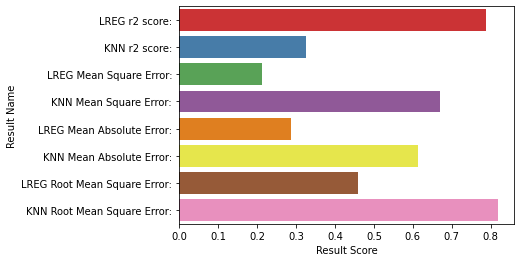

In [72]:
sns.barplot(y='Result Name',x='Result Score',data=LRDF,palette='Set1')